In [2]:
import pandas as pd
import numpy as py
import seaborn as sns 
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import math


In [48]:
# Teammate 0 code begins here

In [49]:
# Teammate 0 code ends here

In [50]:
# Teammate Carrie code begins here- Making Heat Maps 

In [51]:
#import gun ownership data, create dataframe
gun_ownership_df=pd.read_csv("Raw_Data/gun_ownership_by_state.csv")
gun_ownership_df.set_index("State",inplace=True)
gun_ownership_df



,Rank,# of guns per capita,# of guns registered
State,,,
Wyoming,1,229.24,132806.00
Washington D.C.,2,68.05,47228.00
New Hampshire,3,46.76,64135.00
New Mexico,4,46.73,97580.00
Virginia,5,36.34,307822.00
Alabama,6,33.15,161641.00
Idaho,7,28.86,49566.00
Arkansas,8,26.57,79841.00
Nevada,9,25.64,76888.00


In [52]:
#create dataframe of just state and guns 
df2= gun_ownership_df[[ "# of guns per capita"]]
df2
gun_ownership_dict=df2.to_dict("dict")
gun_ownership_dict2={key: float(value) for (key, value) in gun_ownership_dict["# of guns per capita"].items() if key != "North"}


In [53]:
gun_ownership_dict["# of guns per capita"]

{'Wyoming': '229.24',
 'Washington D.C.': '68.05',
 'New Hampshire': '46.76',
 'New Mexico': '46.73',
 'Virginia': '36.34',
 'Alabama': '33.15',
 'Idaho': '28.86',
 'Arkansas': '26.57',
 'Nevada': '25.64',
 'Arizona': '25.61',
 'Louisiana': '24.94',
 'South Dakota': '24.29',
 'Utah': '23.48',
 'Connecticut': '22.96',
 'Alaska': '21.38',
 'Montana': '21.06',
 'South Carolina': '21.01',
 'Texas': '20.79',
 'West Virginia': '19.42',
 'Pennsylvania': '18.45',
 'Georgia': '18.22',
 'Kentucky': '18.2',
 'Oklahoma': '18.13',
 'Kansas': '18.06',
 'North': 'Dakota',
 'Indiana': '17.1',
 'Maryland': '17.03',
 'Colorado': '16.48',
 'Florida': '16.35',
 'Ohio': '14.87',
 'North Carolina': '14.818',
 'Oregon': '14.816',
 'Tennessee': '14.76',
 'Minnesota': '14.22',
 'Washington': '12.4',
 'Missouri': '11.94',
 'Mississippi': '11.89',
 'Nebraska': '11.57',
 'Maine': '11.5',
 'Illinois': '11.44',
 'Wisconsin': '11.19',
 'Vermont': '9.41',
 'Iowa': '9.05',
 'California': '8.71',
 'Michigan': '6.59',
 

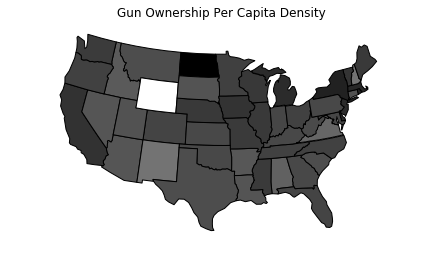

In [54]:

# Create HeatMap 

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())

ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())

shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                     category='cultural', name=shapename)

gun_ownership_dict2
  

ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)

ax.set_title('Gun Ownership Per Capita Density ')

#for state in shpreader.Reader(states_shp).geometries():
for astate in shpreader.Reader(states_shp).records():

    ### You want to replace the following code with code that sets the
    ### facecolor as a gradient based on the population density above
    #facecolor = [0.9375, 0.9375, 0.859375]

    edgecolor = 'black'

    try:
        # use the name of this state to get pop_density
        state_dens = gun_ownership_dict2[ astate.attributes['name'] ]
    except:
        state_dens = 0
    #print(state_dens)

    # simple scheme to assign color to each state
    scaled_state_dens=math.sqrt(state_dens)
    scaling_factor=1.0/math.sqrt(229.24)
    
    facecolor= (scaling_factor*scaled_state_dens, scaling_factor*scaled_state_dens,scaling_factor*scaled_state_dens)

    # `astate.geometry` is the polygon to plot
    ax.add_geometries([astate.geometry], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor=edgecolor)

plt.show()


In [4]:
crime_by_state_df=pd.read_csv("Raw_Data/CrimeStatebyState_US.csv")
crime_by_state_df.head()

ParserError: Error tokenizing data. C error: Expected 1 fields in line 6, saw 24


In [ ]:
# Heat map, robbery by state

In [ ]:
# Heat map, motor vechile theft by state 

In [ ]:
# Teammate Carrie code begins here- Making Heat Maps 

In [1]:
gun_ownership_by_state.txt="gun_ownership_by_state.txt"
gun_ownership_by_state.txt.head()


NameError: name 'gun_ownership_by_state' is not defined

In [7]:
with open ("gun_ownership_by_state.txt", "r") as myfile:
    gun_ownership=myfile.readlines()

FileNotFoundError: [Errno 2] No such file or directory: 'gun_ownership_by_state.txt'

In [ ]:
# Teammate Carrie code ends here

In [ ]:
# Teammate 2 code begins here

In [ ]:
# Teammate 2 code ends here

In [ ]:
# Teammate 3 code begins here

In [ ]:
# Teammate 3 code ends here